## импорт библиотек, импорт данных

In [63]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # импортируем библиотеку

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from datetime import datetime, date, time
from sklearn import preprocessing
from sklearn import utils
#импорт данных
df_match=pd.read_csv('match_final.csv')
df_match['date'] = pd.to_datetime(df_match['date'],dayfirst=True).dt.strftime('%d-%m-%Y')
df_match = df_match.dropna()
df_match = df_match.reset_index(drop=True)
df_match.head(10)

,league_id,name,season,stage,date,match_api_id,home_team_api_id,home_team,away_team_api_id,away_team,...,WHH,WHD,WHA,VCH,VCD,VCA,home_result,away_result,home_superiority,away_superiority
0,1,Belgium Jupiler League,2015/2016,1,25-07-2015,1979833,8571,KV Kortrijk,9985,Standard de Liège,...,2.50,3.25,2.62,2.70,3.4,2.63,1,0,0,0
1,1,Belgium Jupiler League,2015/2016,1,25-07-2015,1979835,8573,KV Oostende,8203,KV Mechelen,...,2.45,3.10,2.80,2.50,3.3,2.88,1,0,0,0
2,1,Belgium Jupiler League,2015/2016,1,25-07-2015,1979836,10000,SV Zulte-Waregem,9994,Sporting Lokeren,...,2.30,3.25,2.88,2.30,3.4,3.10,1,0,0,0
3,1,Belgium Jupiler League,2015/2016,1,26-07-2015,1979837,10001,KVC Westerlo,9991,KAA Gent,...,4.00,3.50,1.80,4.10,3.7,1.87,1,1,0,0
4,1,Belgium Jupiler League,2015/2016,1,26-07-2015,1979838,8635,RSC Anderlecht,8475,Waasland-Beveren,...,1.20,6.00,11.00,1.20,6.5,15.00,1,0,0,0
5,1,Belgium Jupiler League,2015/2016,1,26-07-2015,1979839,9986,Sporting Charleroi,274581,Royal Excel Mouscron,...,1.70,3.40,4.80,1.65,3.8,5.50,1,0,0,0
6,1,Belgium Jupiler League,2015/2016,10,04-10-2015,1979896,8635,RSC Anderlecht,8203,KV Mechelen,...,1.40,4.33,7.00,1.44,4.6,7.00,1,1,5,1
7,1,Belgium Jupiler League,2015/2016,10,04-10-2015,1979897,9991,KAA Gent,8342,Club Brugge KV,...,2.10,3.40,3.10,2.15,3.5,3.30,1,0,4,2
8,1,Belgium Jupiler League,2015/2016,10,04-10-2015,1979898,9987,KRC Genk,9985,Standard de Liège,...,2.00,3.50,3.30,2.15,3.6,3.25,1,0,4,1
9,1,Belgium Jupiler League,2015/2016,10,02-10-2015,1979899,8573,KV Oostende,9994,Sporting Lokeren,...,1.91,3.50,3.60,1.87,3.7,4.10,1,0,4,2


In [64]:
#создаю колонку с результатами матча С ТРЕМЯ ИСХОДАМИ 
# исход 2 - выигрыш home_team
# исход 0 - прогрыш away_team
# исход 1 - ничья 

df_match['result_home_team_api_id'] = df_match.apply(lambda x: 2 if x['home_team_goal'] > x['away_team_goal'] else (0 if x['home_team_goal'] < x['away_team_goal'] else 1 ), axis=1)
df_match['result_away_team_api_id'] = df_match.apply(lambda x: 2 if x['home_team_goal'] < x['away_team_goal'] else (0 if x['home_team_goal'] > x['away_team_goal'] else 1 if x['home_team_goal'] == x['away_team_goal'] else 1), axis=1)

df_match['result_home_team_api_id']=df_match['result_home_team_api_id'].astype('int')
df_match['result_away_team_api_id']=df_match['result_away_team_api_id'].astype('int')

display(df_match)

,league_id,name,season,stage,date,match_api_id,home_team_api_id,home_team,away_team_api_id,away_team,...,WHA,VCH,VCD,VCA,home_result,away_result,home_superiority,away_superiority,result_home_team_api_id,result_away_team_api_id
0,1,Belgium Jupiler League,2015/2016,1,25-07-2015,1979833,8571,KV Kortrijk,9985,Standard de Liège,...,2.62,2.70,3.4,2.63,1,0,0,0,2,0
1,1,Belgium Jupiler League,2015/2016,1,25-07-2015,1979835,8573,KV Oostende,8203,KV Mechelen,...,2.80,2.50,3.3,2.88,1,0,0,0,2,0
2,1,Belgium Jupiler League,2015/2016,1,25-07-2015,1979836,10000,SV Zulte-Waregem,9994,Sporting Lokeren,...,2.88,2.30,3.4,3.10,1,0,0,0,2,0
3,1,Belgium Jupiler League,2015/2016,1,26-07-2015,1979837,10001,KVC Westerlo,9991,KAA Gent,...,1.80,4.10,3.7,1.87,1,1,0,0,1,1
4,1,Belgium Jupiler League,2015/2016,1,26-07-2015,1979838,8635,RSC Anderlecht,8475,Waasland-Beveren,...,11.00,1.20,6.5,15.00,1,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,21518,Spain LIGA BBVA,2015/2016,9,25-10-2015,2030167,9906,Atlético Madrid,10267,Valencia CF,...,7.00,1.57,4.0,7.00,1,0,3,2,2,0
2452,21518,Spain LIGA BBVA,2015/2016,9,24-10-2015,2030168,9864,Málaga CF,9783,RC Deportivo de La Coruña,...,3.10,2.30,3.4,3.40,1,0,3,4,2,0
2453,21518,Spain LIGA BBVA,2015/2016,9,26-10-2015,2030169,8315,Athletic Club de Bilbao,9869,Real Sporting de Gijón,...,7.00,1.55,4.2,7.00,1,0,2,3,2,0
2454,21518,Spain LIGA BBVA,2015/2016,9,24-10-2015,2030170,7878,Granada CF,8603,Real Betis Balompié,...,3.10,2.30,3.4,3.30,1,1,1,3,1,1


In [65]:
df_match['result_home_team_api_id'].unique()

array([2, 1, 0])

In [66]:
df_match['result_away_team_api_id'].value_counts()
# исход 2 - выигрыш home_team
# исход 0 - прогрыш away_team
# исход 1 - ничья 

result_away_team_api_id
0    1084
2     752
1     620
Name: count, dtype: int64

# Вывод: делаем тройную лог.регрессию для учета перекоса побед в сторону домашней команды


## отобранные метриками: 
## сила команд - колонки  ht_strength, at_strength
## результат за пять предидущих матчей - колонки home_superiority, away_superiority

In [67]:
#усреднение букмекеров
df_match['avg_home']=df_match[['B365H','BWH','VCH','IWH','PSH','LBH','WHH']].mean(axis=1)
df_match['avg_draw']=df_match[['B365D','BWD','VCD','IWD','PSD','LBD','WHD']].mean(axis=1)
df_match['avg_away']=df_match[['B365A','BWA','VCA','IWA','PSA','LBA','WHA']].mean(axis=1)
df_match['home%'] = df_match['avg_home']/(df_match['avg_home'] + df_match['avg_away'] + df_match['avg_draw']) 
df_match['draw%'] = df_match['avg_draw']/(df_match['avg_home'] + df_match['avg_away'] + df_match['avg_draw']) 
df_match['away%'] = df_match['avg_away']/(df_match['avg_home'] + df_match['avg_away'] + df_match['avg_draw'])

In [68]:
#сила команд на каждый матч
df_match['ht_strength']= df_match['home_player_1']+df_match['home_player_2']+df_match['home_player_3']+df_match['home_player_4']+df_match['home_player_5']+df_match['home_player_6']+df_match['home_player_7']+df_match['home_player_8']+df_match['home_player_9']+df_match['home_player_10']+df_match['home_player_11']
df_match['at_strength']= df_match['away_player_1']+df_match['away_player_2']+df_match['away_player_3']+df_match['away_player_4']+df_match['away_player_5']+df_match['away_player_6']+df_match['away_player_7']+df_match['away_player_8']+df_match['away_player_9']+df_match['away_player_10']+df_match['away_player_11']

In [69]:
#стандартизация
df_x = df_match[['ht_strength', 'at_strength', 'home_superiority','away_superiority','home%','draw%','away%']]
df_match[['ht_strength_', 'at_strength_',  'home_superiority_','away_superiority_','home%_','draw%_','away%_']] = (df_x-df_x.mean())/df_x. std()
display(df_match)

,league_id,name,season,stage,date,match_api_id,home_team_api_id,home_team,away_team_api_id,away_team,...,away%,ht_strength,at_strength,ht_strength_,at_strength_,home_superiority_,away_superiority_,home%_,draw%_,away%_
0,1,Belgium Jupiler League,2015/2016,1,25-07-2015,1979833,8571,KV Kortrijk,9985,Standard de Liège,...,0.309039,754,776,-1.128785,-0.694983,-2.007134,-1.669183,0.312879,1.044305,-0.497097
1,1,Belgium Jupiler League,2015/2016,1,25-07-2015,1979835,8573,KV Oostende,8203,KV Mechelen,...,0.326609,776,762,-0.707673,-0.963658,-2.007134,-1.669183,0.224528,0.850845,-0.376921
2,1,Belgium Jupiler League,2015/2016,1,25-07-2015,1979836,10000,SV Zulte-Waregem,9994,Sporting Lokeren,...,0.344265,761,754,-0.994795,-1.117187,-2.007134,-1.669183,0.049611,1.056293,-0.256152
3,1,Belgium Jupiler League,2015/2016,1,26-07-2015,1979837,10001,KVC Westerlo,9991,KAA Gent,...,0.188425,739,805,-1.415907,-0.138440,-2.007134,-1.669183,1.281404,0.691810,-1.322101
4,1,Belgium Jupiler League,2015/2016,1,26-07-2015,1979838,8635,RSC Anderlecht,8475,Waasland-Beveren,...,0.643062,818,734,0.096268,-1.501010,-2.007134,-1.669183,-1.508033,-1.977947,1.787626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,21518,Spain LIGA BBVA,2015/2016,9,25-10-2015,2030167,9906,Atlético Madrid,10267,Valencia CF,...,0.546460,903,863,1.723293,0.974645,0.019807,-0.239286,-0.944546,-1.275033,1.126866
2452,21518,Spain LIGA BBVA,2015/2016,9,24-10-2015,2030168,9864,Málaga CF,9783,RC Deportivo de La Coruña,...,0.370834,830,833,0.325966,0.398911,0.019807,1.190610,0.001180,0.368320,-0.074420
2453,21518,Spain LIGA BBVA,2015/2016,9,26-10-2015,2030169,8315,Athletic Club de Bilbao,9869,Real Sporting de Gijón,...,0.545872,875,811,1.187332,-0.023293,-0.655840,0.475662,-0.989006,-1.048433,1.122846
2454,21518,Spain LIGA BBVA,2015/2016,9,24-10-2015,2030170,7878,Granada CF,8603,Real Betis Balompié,...,0.357377,810,828,-0.056863,0.302956,-1.331487,0.475662,0.049207,0.607705,-0.166469


In [8]:
# # написание класса для тройной лог регресии
# class OVR_LogReg():
 
#   def __init__(self):
#     self.models_thetas = []
#     self.models_loss = []
 
#   def fit(self, x, y, iter = 20000, learning_rate = 0.001):
 
#     dfs = self.preprocess(x, y)
 
#     models_thetas, models_loss = [], []
 
#     for ovr_df in dfs:
 
#       x = ovr_df.drop('target', axis = 1).copy()
#       y = ovr_df.target.copy()
 
#       self.add_ones(x)
 
#       loss_history = []
#       thetas, n = np.zeros(x.shape[1]), x.shape[0]
 
#       for i in range(iter):
#         y_pred = self.h(x, thetas)
#         loss_history.append(self.objective(y, y_pred))
#         grad = self.gradient(x, y, y_pred, n)
#         thetas -= learning_rate * grad
 
#       models_thetas.append(thetas)
#       models_loss.append(loss_history)
 
#     self.models_thetas = models_thetas
#     self.models_loss = models_loss
 
#   def predict(self, x):
#     x = x.copy()
#     probs = []
#     self.add_ones(x)
#     for t in self.models_thetas:
#       z = np.dot(x, t)
#       prob = np.array([self.stable_sigmoid(value) for value in z])
#       probs.append(prob)
 
#     all_probs = np.concatenate(probs, axis = 0).reshape(len(probs), -1).T
#     y_pred = np.argmax(all_probs, axis = 1)
 
#     return y_pred, all_probs
 
#   def preprocess(self, x, y):
 
#     x, y = x.copy(), y.copy()
 
#     x['target'] = y
#     classes = x.target.unique()
    
#     dfs = []
#     ovr_df = None
 
#     for c in classes:
#       ovr_df = x.drop('target', axis = 1).copy()
#       ovr_df['target'] = np.where(x['target'] == classes[c], 1, 0)
#       dfs.append(ovr_df)
 
#     return dfs
  
#   def add_ones(self, x):
#     return x.insert(0,'x0', np.ones(x.shape[0]))
 
#   def h(self, x, thetas):
#     z = np.dot(x, thetas)
#     return np.array([self.stable_sigmoid(value) for value in z])
 
#   def objective(self, y, y_pred):
#     y_one_loss = y * np.log(y_pred + 1e-9)
#     y_zero_loss = (1 - y) * np.log(1 - y_pred + 1e-9)
#     return -np.mean(y_zero_loss + y_one_loss)
 
#   def gradient(self, x, y, y_pred, n):
#     return np.dot(x.T, (y_pred - y)) / n
 
#   def stable_sigmoid(self, z):
#     if z >= 0:
#         return 1 / (1 + np.exp(-z))
#     else:
#         return np.exp(z) / (np.exp(z) + 1)

In [70]:
# написание класса для тройной лог регресии
class OVR_LogReg():
 
    def __init__(self):
        self.models_thetas = []
        self.models_loss = []
 
    def fit(self, x, y, iter = 20000, learning_rate = 0.001):
 
        dfs = self.preprocess(x, y)
 
        models_thetas, models_loss = [], []
 
        for ovr_df in dfs:
 
            x = ovr_df.drop('target', axis = 1).copy()
            y = ovr_df.target.copy()
 
            self.add_ones(x)
 
            loss_history = []
            thetas, n = np.zeros(x.shape[1]), x.shape[0]
 
            for i in range(iter):
                y_pred = self.h(x, thetas)
                loss_history.append(self.objective(y, y_pred))
                grad = self.gradient(x, y, y_pred, n)
                thetas -= learning_rate * grad
 
            models_thetas.append(thetas)
            models_loss.append(loss_history)
 
        self.models_thetas = models_thetas
        self.models_loss = models_loss
 
    def predict(self, x):
        x = x.copy()
        probs = []
        self.add_ones(x)
        for t in self.models_thetas:
            z = np.dot(x, t)
            prob = np.array([self.stable_sigmoid(value) for value in z])
            probs.append(prob)
 
        all_probs = np.concatenate(probs, axis = 0).reshape(len(probs), -1).T
        y_pred = np.argmax(all_probs, axis = 1)
 
        return y_pred, all_probs
 
    def preprocess(self, x, y):
 
        x, y = x.copy(), y.copy()
 
        x['target'] = y
        classes = x.target.unique()
    
        dfs = []
        ovr_df = None
 
        for c in classes:
            ovr_df = x.drop('target', axis = 1).copy()
            ovr_df['target'] = np.where(x['target'] == classes[c], 1, 0)
            dfs.append(ovr_df)
 
        return dfs
  
    def add_ones(self, x):
        return x.insert(0,'x0', np.ones(x.shape[0]))
 
    def h(self, x, thetas):
        z = np.dot(x, thetas)
        return np.array([self.stable_sigmoid(value) for value in z])
 
    def objective(self, y, y_pred):
        y_one_loss = y * np.log(y_pred + 1e-9)
        y_zero_loss = (1 - y) * np.log(1 - y_pred + 1e-9)
        return -np.mean(y_zero_loss + y_one_loss)
 
    def gradient(self, x, y, y_pred, n):
        return np.dot(x.T, (y_pred - y)) / n
 
    def stable_sigmoid(self, z):
        if z >= 0:
            return 1 / (1 + np.exp(-z))
        else:
            return np.exp(z) / (np.exp(z) + 1)

In [71]:
df_match_or=df_match

In [72]:
df_match=df_match.head(1000)

In [53]:
#Проверка наших метрик

X = df_match[['home_superiority_','away_superiority_', 
              'ht_strength_','at_strength_']]
y = df_match['result_home_team_api_id']
 
model = OVR_LogReg()
model.fit(X, y)
 
y_pred, probs = model.predict(X)
accuracy_score(y_pred, y)

0.535

In [73]:
#Проверка предсказаний букмекеров


X = df_match[['home%_', 'draw%_', 'away%_']]
y = df_match['result_home_team_api_id']
 
model = OVR_LogReg()
model.fit(X, y)
 
y_pred, probs = model.predict(X)
accuracy_score(y_pred, y)

0.492

## Вывод: Получили схожие результаты

# Обучение моделей

In [74]:
class LogReg():
 
  # в методе .__init__() объявим переменные для весов и уровня ошибки
  def __init__(self):
    self.thetas = None
    self.loss_history = []
 
  # метод .fit() необходим для обучения модели
  # этому методу мы передадим признаки и целевую переменную
  # кроме того, мы зададим значения по умолчанию
  # для количества итераций и скорости обучения
  def fit(self, x, y, iter = 20000, learning_rate = 0.001):
 
    # метод создаст "правильные" копии датафрейма
    x, y = x.copy(), y.copy()
 
    # добавит столбец из единиц
    self.add_ones(x)
 
    # инициализирует веса и запишет в переменную n количество наблюдений
    thetas, n = np.zeros(x.shape[1]), x.shape[0]
 
    # создадим список для записи уровня ошибки
    loss_history = []
 
    # в цикле равном количеству итераций
    for i in range(iter):
      # метод сделает прогноз с текущими весами
      y_pred = self.h(x, thetas)
      # найдет и запишет уровень ошибки
      loss_history.append(self.objective(y, y_pred))
      # рассчитает градиент
      grad = self.gradient(x, y, y_pred, n)
      # и обновит веса
      thetas -= learning_rate * grad
 
      # метод выдаст веса и список с историей ошибок
      self.thetas = thetas
      self.loss_history = loss_history
 
  # метод .predict() делает прогноз с помощью обученной модели
  def predict(self, x):
 
    # метод создаст "правильную" копию модели
    x = x.copy()
    # добавит столбец из единиц
    self.add_ones(x)
    # рассчитает значения линейной функции
    z = np.dot(x, self.thetas)
    # передаст эти значения в сигмоиду
    probs = np.array([self.stable_sigmoid(value) for value in z])
    # выдаст принадлежность к определенному классу и соответствующую вероятность
    return np.where(probs >= 0.5, 1, 0), probs
 
  # ниже приводятся служебные методы, смысл которых был разобран ранее
  def add_ones(self, x):
    return x.insert(0,'x0', np.ones(x.shape[0]))
 
  def h(self, x, thetas):
    z = np.dot(x, thetas)
    return np.array([self.stable_sigmoid(value) for value in z])
 
  def objective(self, y, y_pred):
    y_one_loss = y * np.log(y_pred + 1e-9)
    y_zero_loss = (1 - y) * np.log(1 - y_pred + 1e-9)
    return -np.mean(y_zero_loss + y_one_loss)
 
  def gradient(self, x, y, y_pred, n):
    return np.dot(x.T, (y_pred - y)) / n
 
  def stable_sigmoid(self, z):
    if z >= 0:
        return 1 / (1 + np.exp(-z))
    else:
        return np.exp(z) / (np.exp(z) + 1)

In [88]:
# поместим признаки и данные в соответствующие переменные
x1,x2,x3,x4 = df_match['ht_strength_'],df_match['home_superiority_'], df_match['at_strength_'], df_match['away_superiority_']
 
#['home_superiority_','away_superiority_', 'ht_strength_','at_strength_']
    
target = df_match['result_home_team_api_id'].unique()
target[0]

2

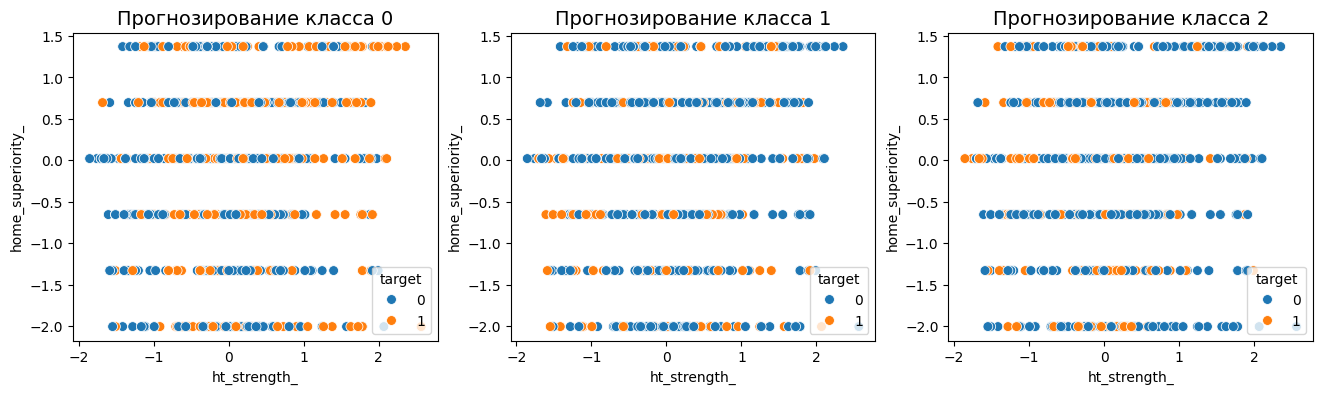

In [89]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ovr_0, ovr_1, ovr_2 = df_match.copy(), df_match.copy(), df_match.copy()
 
# в каждом из них сделаем целевым классом 0-й, 1-й или 2-й классы
# например, в ovr_0 первым классом будет класс 0, а классы 1 и 2 - нулевым
ovr_0['target'] = np.where(df_match['result_home_team_api_id'] == target[0], 1, 0)
ovr_1['target'] = np.where(df_match['result_home_team_api_id'] == target[1], 1, 0)
ovr_2['target'] = np.where(df_match['result_home_team_api_id'] == target[2], 1, 0)
 
# выведем разделение на классы на графике
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, 
                                    figsize = (16, 4),
                                    gridspec_kw = {'wspace': 0.2, 'hspace': 0.08})
 
sns.scatterplot(data = ovr_0, x = x1, y = x2, hue = 'target', s = 50, ax = ax1)
ax1.set_title('Прогнозирование класса 0', fontsize = 14)
 
sns.scatterplot(data = ovr_1, x = x1, y = x2, hue = 'target', s = 50, ax = ax2)
ax2.set_title('Прогнозирование класса 1', fontsize = 14)
 
sns.scatterplot(data = ovr_2, x = x1, y = x2, hue = 'target', s = 50, ax = ax3)
ax3.set_title('Прогнозирование класса 2', fontsize = 14)
 
plt.show()

In [91]:
models = []
 
# поочередно обучим каждую из моделей
for ova_n in [ovr_0, ovr_1, ovr_2]:
    #X = ova_n[['ht_strength_','home_superiority_']]
    X = ova_n[['ht_strength_','home_superiority_','at_strength_','away_superiority_' ]]
    y = ova_n['result_home_team_api_id']
 
    model = LogReg()
    model.fit(X, y)
 
    # каждую обученную модель поместим в список
    models.append(model)

## Прогноз и оценка качества

In [78]:
df_future=pd.read_csv('prediction_future_match_v2.csv')

In [92]:
# вновь перенесем данные из исходного датафрейма
X = df_match_or[['home_superiority_','away_superiority_', 'ht_strength_','at_strength_']]
#y = df_future['target']
 
# в список probs будем записывать результат каждой модели
# для каждого наблюдения
probs = []
 
for model in models:
    ABB, prob = model.predict(X)
    probs.append(prob)

In [86]:
# вновь перенесем данные из исходного датафрейма
X = df_future[['strength_side_1','superiority_side_1']]
#y = df_future['target']
 
# в список probs будем записывать результат каждой модели
# для каждого наблюдения
probs = []
 
for model in models:
    ABB, prob = model.predict(X)
    probs.append(prob)

In [93]:
# очевидно, для каждого наблюдения у нас будет три вероятности
# принадлежности к целевому классу
probs[0][500], probs[1][500], probs[2][500]

(0.052594198308251176, 0.052594198308251176, 0.052594198308251176)

In [94]:
probs[2]

array([0.77022453, 0.64185108, 0.77924143, ..., 0.84308826, 0.90125168,
       0.92722999])

In [29]:
# склеим и изменим размерность массива таким образом, чтобы
# строки были наблюдениями, а столбцы вероятностями
all_probs = np.concatenate(probs, axis = 0).reshape(len(probs), -1).T
all_probs.shape

(11781, 3)

In [30]:
# найдем максимальную вероятность в каждой строке,
# индекс вероятности [0, 1, 2] и будет прогнозом
y_pred = np.argmax(all_probs, axis = 1)

In [31]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
df_future['pred']=y_pred

In [34]:
df_future.to_csv(r"Prediction_future_v4.csv", encoding='utf-8-sig',index=False)

In [ ]:
# Подготовка датасетов  ДЛЯ ДОМАШНЕЙ КОМАНДЫ

# поместим признаки и данные в соответствующие переменные


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


x1,x2,x3,x4 = df_match['ht_strength_'],df_match['at_strength_'], df_match['home_superiority_'],df_match['away_superiority_'] 
# это колонки  'home_superiority' и 'ht_strength' 

# Мы уже имеем целевой столбец 'result_home_team_api_id' в df_match.
# Получим уникальные значения этого столбца, которые представляют классы исходов
target = df_match['result_home_team_api_id'].unique()

print(target)

In [ ]:
# # Создадим копии DataFrame для каждого класса
# ovr_0, ovr_1, ovr_2 = df_match.copy(), df_match.copy(), df_match.copy()

# # Переназначим классы
# ovr_0['target'] = np.where(df_match['result_home_team_api_id'] == target[0], 1, 0)
# ovr_1['target'] = np.where(df_match['result_home_team_api_id'] == target[1], 1, 0)
# ovr_2['target'] = np.where(df_match['result_home_team_api_id'] == target[2], 1, 0)

# # Построим графики
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (16, 4), gridspec_kw = {'wspace': 0.2, 'hspace': 0.08})

# sns.scatterplot(data=ovr_0, x=x1, y=x2, hue='target', s=50, ax=ax1)
# ax1.set_title('Прогнозирование класса 0', fontsize=14)

# sns.scatterplot(data=ovr_1, x=x1, y=x2, hue='target', s=50, ax=ax2)
# ax2.set_title('Прогнозирование класса 1', fontsize=14)

# sns.scatterplot(data=ovr_2, x=x1, y=x2, hue='target', s=50, ax=ax3)
# ax3.set_title('Прогнозирование класса 2', fontsize=14)

# plt.show()

In [ ]:
# #model = LogReg() лишний



# from sklearn.linear_model import LogisticRegression

# # поочередно обучим каждую из моделей
# models = []
# for ova_n in [ovr_0, ovr_1, ovr_2]:

#     X = ova_n[[ 'ht_strength_','aw_strength_','home_superiority_', 'away_superiority_']]
#     y = ova_n['target']

#     model = LogisticRegression() # В МАТЕРИАЛЕ ТУТ СТОИТ  model = LogReg() , НО С LogReg() НЕ РАБОТАЕТ
#     model.fit(X, y) 

#     # каждую обученную модель поместим в список
#     models.append(model)

#     models
# # ЭТОТ КОД РАБОТАЕТ НО ВОТ В СЛЕДУЮЩЕЙ ЯЧЕЙКЕ ВЫДАЕТ ОШИБКУ

In [ ]:
# # ВОТ ЭТОТ КУСОК КОДА НЕ РАБОТАЕТ, ТУТ ДОЛЖНА ВЫВОДИТСЯ "Прогноз и оценка качества"
# # вновь перенесем данные из исходного датафрейма
# X = df_match[['home_superiority', 'ht_strength']]
# y = df_match['result_home_team_api_id']
 
# # в список probs будем записывать результат каждой модели
# # для каждого наблюдения
# probs = []
 
# for model in models:
#     abc, prob = model.predict(X)
#     probs.append(prob)

# # очевидно, для каждого наблюдения у нас будет три вероятности
# # принадлежности к целевому классу
# probs[0][0], probs[1][0], probs[2][0]

# # склеим и изменим размерность массива таким образом, чтобы
# # строки были наблюдениями, а столбцы вероятностями
# all_probs = np.concatenate(probs, axis = 0).reshape(len(probs), -1).T
# all_probs.shape

# # каждая из 178 строк - это вероятность одного наблюдения
# # принадлежать к классу 0, 1, 2
# all_probs[0]

# #array([0.91611483, 0.15409134, 0.02662113])


In [ ]:
df_match.isna().sum()

In [ ]:
class LogReg():
 
  # в методе .__init__() объявим переменные для весов и уровня ошибки
  def __init__(self):
    self.thetas = None
    self.loss_history = []
 
  # метод .fit() необходим для обучения модели
  # этому методу мы передадим признаки и целевую переменную
  # кроме того, мы зададим значения по умолчанию
  # для количества итераций и скорости обучения
  def fit(self, x, y, iter = 20000, learning_rate = 0.001):
 
    # метод создаст "правильные" копии датафрейма
    x, y = x.copy(), y.copy()
 
    # добавит столбец из единиц
    self.add_ones(x)
 
    # инициализирует веса и запишет в переменную n количество наблюдений
    thetas, n = np.zeros(x.shape[1]), x.shape[0]
 
    # создадим список для записи уровня ошибки
    loss_history = []
 
    # в цикле равном количеству итераций
    for i in range(iter):
      # метод сделает прогноз с текущими весами
      y_pred = self.h(x, thetas)
      # найдет и запишет уровень ошибки
      loss_history.append(self.objective(y, y_pred))
      # рассчитает градиент
      grad = self.gradient(x, y, y_pred, n)
      # и обновит веса
      thetas -= learning_rate * grad
 
      # метод выдаст веса и список с историей ошибок
      self.thetas = thetas
      self.loss_history = loss_history
 
  # метод .predict() делает прогноз с помощью обученной модели
  def predict(self, x):
 
    # метод создаст "правильную" копию модели
    x = x.copy()
    # добавит столбец из единиц
    self.add_ones(x)
    # рассчитает значения линейной функции
    z = np.dot(x, self.thetas)
    # передаст эти значения в сигмоиду
    probs = np.array([self.stable_sigmoid(value) for value in z])
    # выдаст принадлежность к определенному классу и соответствующую вероятность
    return np.where(probs >= 0.5, 1, 0), probs
 
  # ниже приводятся служебные методы, смысл которых был разобран ранее
  def add_ones(self, x):
    return x.insert(0,'x0', np.ones(x.shape[0]))
 
  def h(self, x, thetas):
    z = np.dot(x, thetas)
    return np.array([self.stable_sigmoid(value) for value in z])
 
  def objective(self, y, y_pred):
    y_one_loss = y * np.log(y_pred + 1e-9)
    y_zero_loss = (1 - y) * np.log(1 - y_pred + 1e-9)
    return -np.mean(y_zero_loss + y_one_loss)
 
  def gradient(self, x, y, y_pred, n):
    return np.dot(x.T, (y_pred - y)) / n
 
  def stable_sigmoid(self, z):
    if z >= 0:
        return 1 / (1 + np.exp(-z))
    else:
        return np.exp(z) / (np.exp(z) + 1)